In [921]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [922]:
import math 
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [923]:
def generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points):
    dataset = []
    while total_number_of_data_points > 0:
        x = round(random.uniform(-10, 10), 2)
        noise = scaling_factor * np.random.normal(0, 1)
        y = (-2 * math.cos(x) / math.pi) + (x / math.pi) - (2 * math.cos(3 * x) / (3 * math.pi)) + noise
        dataset.append((x,y))
        total_number_of_data_points-=1
    return dataset

In [924]:
def find_error(Y_true, Y_pred):
    n = len(Y_true)
    mean_square_error = 0
    for i in range (n):
       mean_square_error = mean_square_error + (Y_true[i] - Y_pred[i]) ** 2
    mean_square_error = mean_square_error / n
    return mean_square_error

In [925]:
def polynomial_regression_sklearn(X, Y, degree):
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(-1, 1)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, Y)
    return np.insert(model.coef_, 0, model.intercept_)

In [926]:
def polynomial_regressor_gaus(X, Y, degree):
    coefficients = polynomial_regression_sklearn(X, Y, degree)
    Y_pred = []
    n = len(X)
    for i in range (n):
        y_pred = 0
        for deg in range (degree+1):
            y_pred = y_pred + coefficients[deg] * pow(X[i], deg)
        Y_pred.append(y_pred)
    return Y_pred

In [927]:
random.seed(65)
total_number_of_data_points = 50
scaling_factor = 0.1
dataset50 = generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points)
X = [dataset_instance[0] for dataset_instance in dataset50]
Y = [dataset_instance[1] for dataset_instance in dataset50]

In [928]:
print(dataset50)

[(-1.71, -0.6134156694473599), (-4.25, -1.278827600112874), (6.89, 1.6312309755820988), (-1.12, -0.5217890960480581), (0.57, -0.1448034038794996), (1.03, 0.15158548419858173), (-3.22, -0.1790267350520582), (2.79, 1.6350545406759662), (8.0, 2.522806158097977), (-8.56, -2.575023947141922), (1.22, 0.2711849084838487), (-4.72, -1.5393604555031992), (3.11, 1.7924450603439974), (2.47, 1.2093070314098946), (-9.09, -2.1867285601479654), (-7.74, -2.4224837604359535), (0.57, -0.39805482622669164), (7.17, 2.2662866082713595), (5.95, 1.3738225919607692), (6.48, 1.1391351060641401), (-7.26, -2.384331780254835), (-2.99, -0.19119502846595593), (1.54, 0.5704979101886936), (-2.67, -0.2662073067909238), (-5.39, -1.7888842990679679), (8.44, 2.766098285427602), (2.7, 1.5456792544555287), (-2.04, -0.7952651953133718), (-0.48, -0.7954629266490001), (3.99, 1.4418030382866733), (5.19, 1.6524431528188694), (5.59, 1.3474924497032894), (-3.31, -0.3617675061004893), (9.35, 3.81152087827029), (5.26, 1.510574719943

In [929]:
def plotGraph(X, Y, title):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 0.5)
    plt.plot(X, Y, marker='o', linestyle='-', color='b', label='Data Points')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()  
    plt.show()

In [930]:
def scatter_plot(X, Y, title):
    fig, ax = plt.subplots()
    ax.set_xlim(-11, 11)
    ax.set_ylim(-10, 10)
    plt.scatter(X, Y, marker='o', color='blue')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()  
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


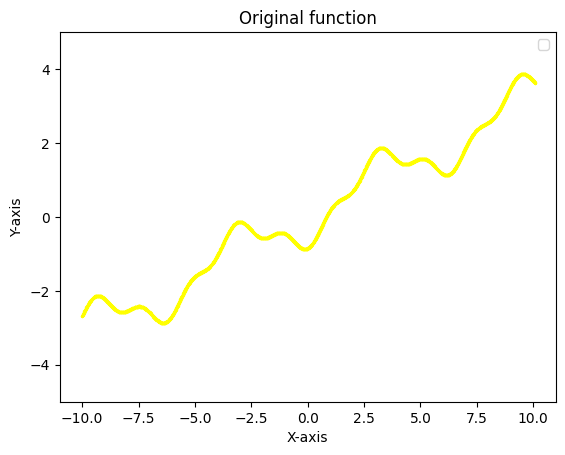

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


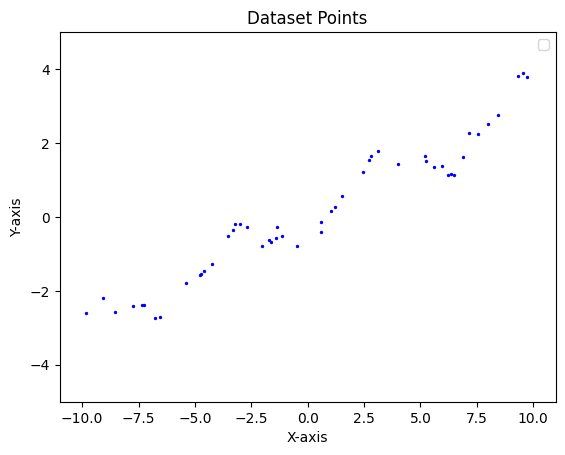

In [931]:
X_cont = []
Y_cont = []
for x in np.arange(-10.0, 10.1, 0.01):
    X_cont.append(x)
    Y_cont.append((-2 * math.cos(x) / math.pi) + (x / math.pi) - (2 * math.cos(3 * x) / (3 * math.pi)))
fig, ax = plt.subplots()
ax.set_xlim(-11, 11)
ax.set_ylim(-5, 5)
plt.scatter(X_cont, Y_cont, marker='o',  s=2, color='yellow')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original function')
plt.legend()  
plt.show()

fig, ax = plt.subplots()
ax.set_xlim(-11, 11)
ax.set_ylim(-5, 5)
plt.scatter(X, Y, marker='o',  s=2, color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Dataset Points')
plt.legend()  
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.04270999 0.31051206]


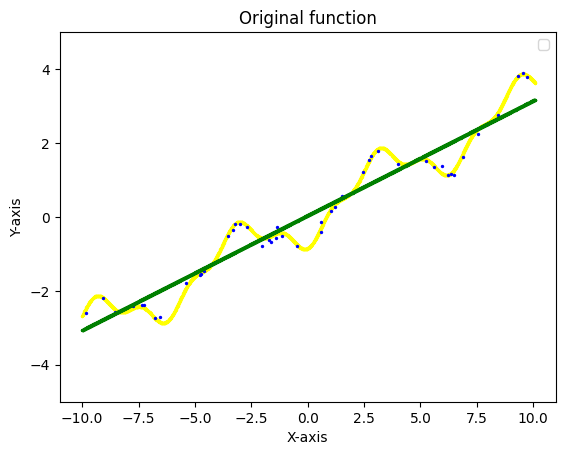

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.03470802  0.30873685  0.00252246]


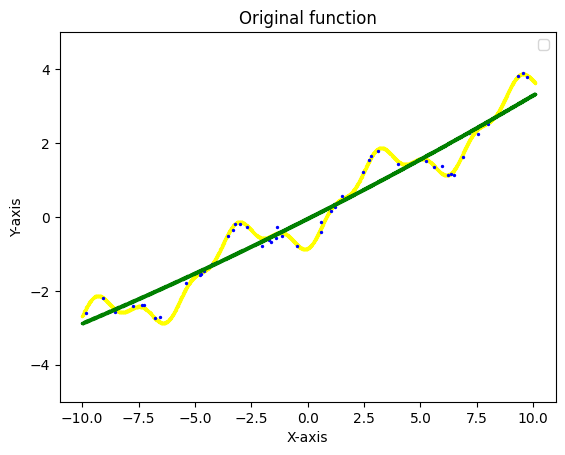

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.04113245  0.26600293  0.00240613  0.0007429 ]


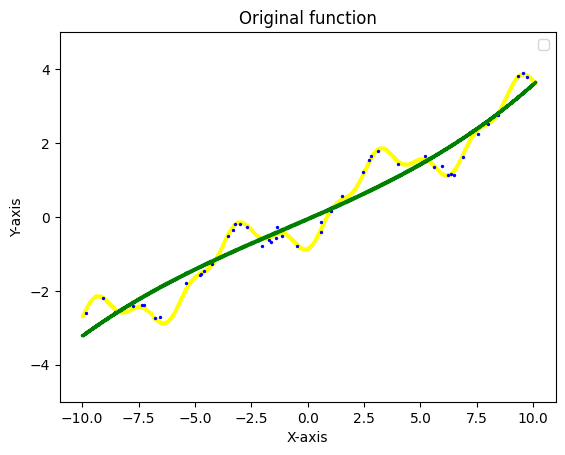

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 0.20661244  0.27916081 -0.02279649  0.0005205   0.00029914]


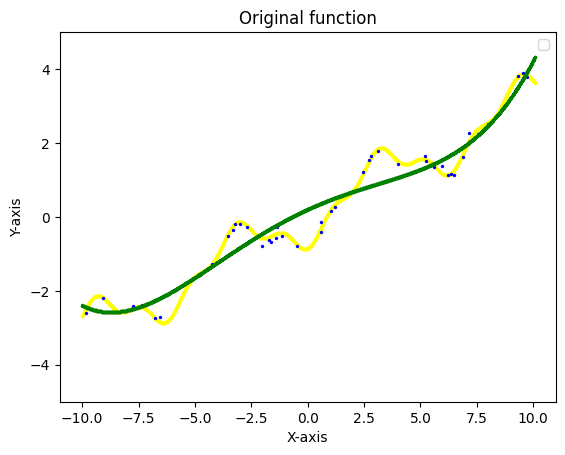

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 2.12350054e-01  3.07669904e-01 -2.25219405e-02 -8.10061544e-04
  2.93830975e-04  1.19540480e-05]


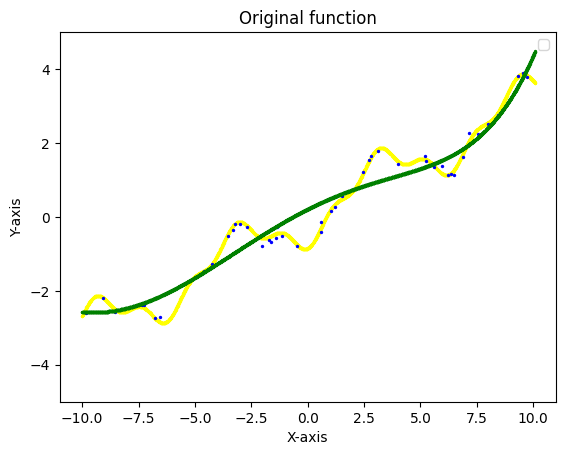

[ 6.08747388e-02  3.17788920e-01  1.13842533e-02 -1.18303476e-03
 -7.38012450e-04  1.47503369e-05  7.57047797e-06]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


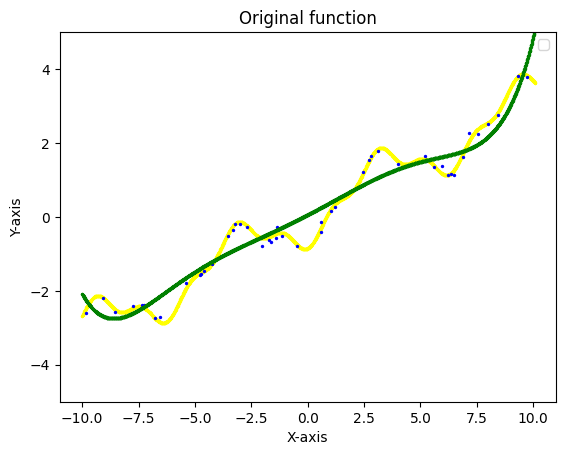

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 6.32456464e-02  3.41343115e-01  1.13208869e-02 -3.47307627e-03
 -7.31406202e-04  6.76054335e-05  7.49644985e-06 -3.36085798e-07]


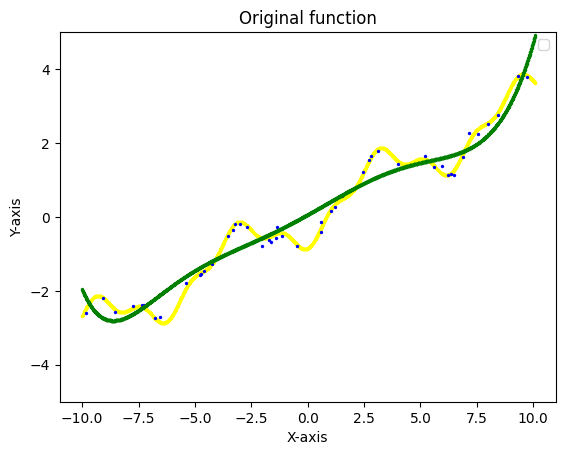

[-2.91392160e-01  3.66711515e-01  1.40580553e-01 -4.15632911e-03
 -8.00157536e-03  8.06872497e-05  1.37286823e-04 -4.45576622e-07
 -7.12626884e-07]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


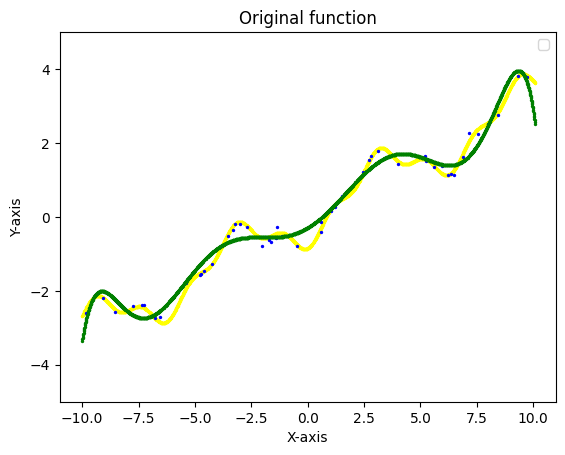

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-3.01435367e-01  3.37211749e-01  1.43978709e-01  6.73706534e-04
 -8.18056919e-03 -1.17826206e-04  1.40457628e-04  2.51152518e-06
 -7.30406215e-07 -1.44585906e-08]


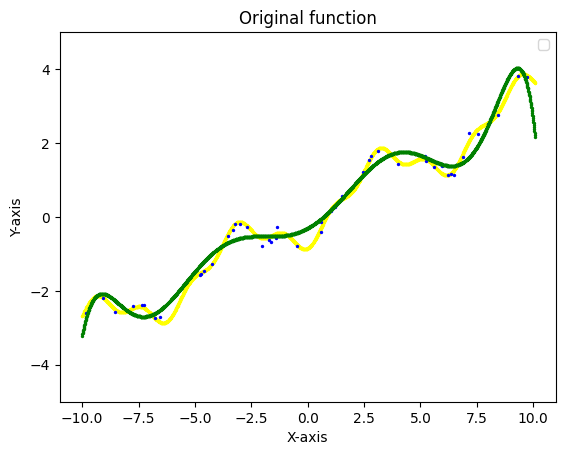

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-5.16925393e-01  3.46652587e-01  2.57060321e-01 -8.83732792e-04
 -1.82627547e-02 -1.64252467e-05  4.52489340e-04  4.58200784e-07
 -4.63973871e-06 -2.05880338e-09  1.70041739e-08]


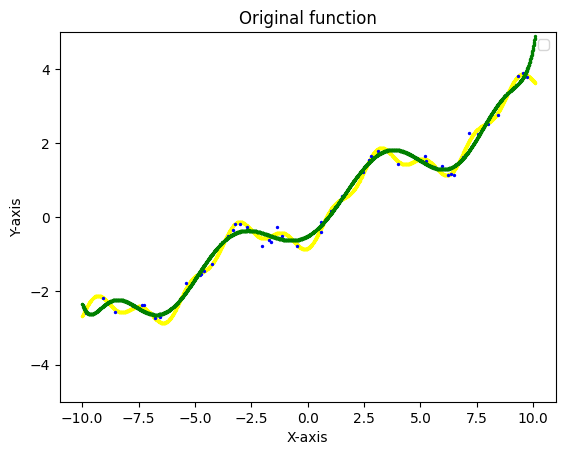

[-5.16616369e-01  3.61082799e-01  2.57468436e-01 -4.37682383e-03
 -1.83355912e-02  2.06696753e-04  4.54865757e-04 -5.22550393e-06
 -4.66643079e-06  6.03989254e-08  1.70991053e-08 -2.47032490e-10]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


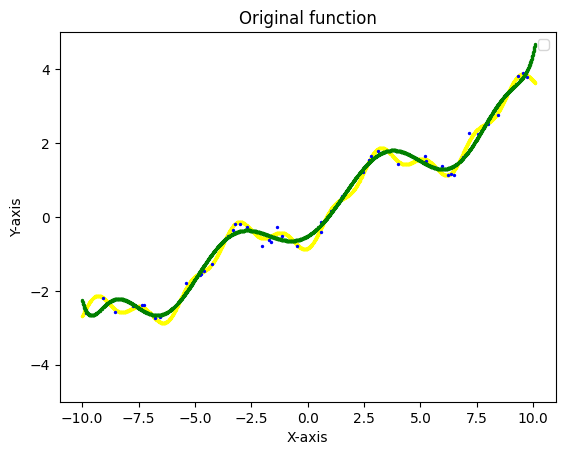

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-5.98778616e-01  3.66349282e-01  3.17625644e-01 -4.80545537e-03
 -2.63002858e-02  1.79744584e-04  8.36789570e-04 -3.72347464e-06
 -1.28517186e-05  3.93362727e-08  9.71290059e-08 -1.57548118e-10
 -2.90848188e-10]


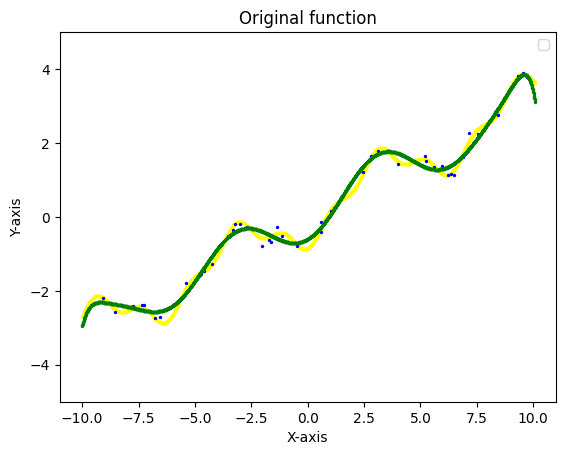

[-6.00953174e-01  3.91883602e-01  3.19872394e-01 -1.30639746e-02
 -2.66392241e-02  9.20993573e-04  8.53894713e-04 -3.19386924e-05
 -1.32312301e-05  5.57736926e-07  1.00930460e-07 -4.69890451e-09
 -3.04836145e-10  1.52039515e-11]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


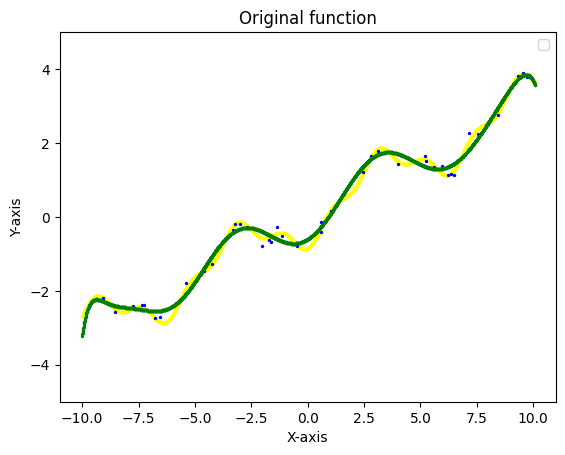

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-5.14809045e-01  3.79492872e-01  2.36439746e-01 -1.15891591e-02
 -1.17634637e-02  9.64097640e-04 -1.29582040e-04 -3.73610114e-05
  1.74865424e-05  7.01532474e-07 -3.88984417e-07 -6.23213185e-09
  3.55251894e-09  2.10101499e-11 -1.18824855e-11]


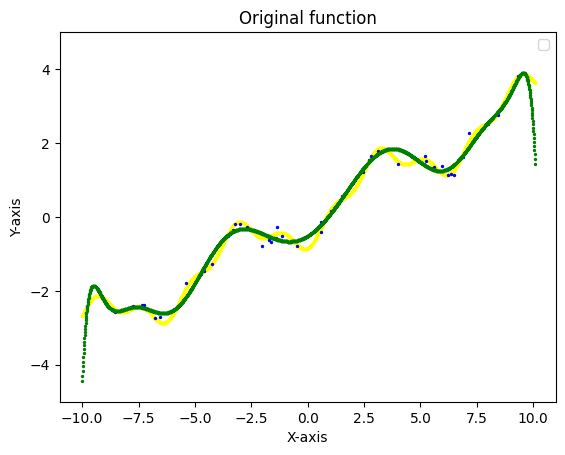

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-5.20452313e-01  4.10069363e-01  2.41319367e-01 -2.60152938e-02
 -1.26293727e-02  2.82846407e-03 -6.65464989e-05 -1.40617791e-04
  1.53497347e-05  3.58020830e-06 -3.52608289e-07 -4.86075101e-08
  3.25020471e-09  3.35243478e-10 -1.09082815e-11 -9.23947269e-13]


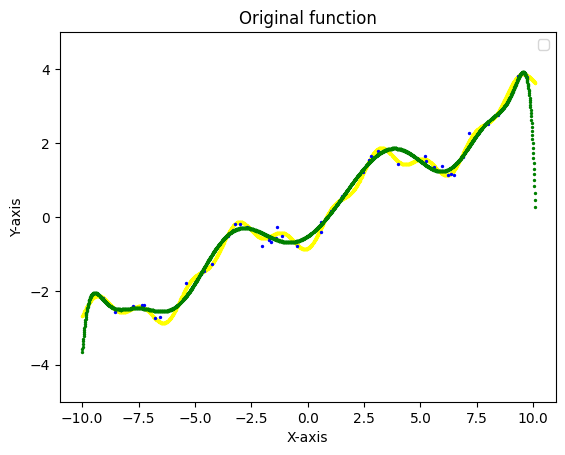

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.79265979e-01  9.38405805e-02 -5.56902006e-02  6.28075993e-02
  4.07025386e-02 -5.46843449e-03 -3.93575308e-03  2.31320958e-04
  1.58011568e-04 -5.38992756e-06 -3.27777641e-06  7.03518437e-08
  3.70526552e-08 -4.80489647e-10 -2.16887342e-10  1.33357343e-12
  5.14735704e-13]


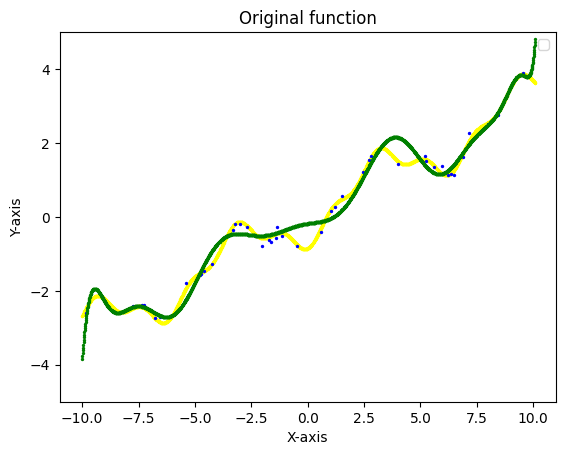

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-2.97861955e-01  2.94891321e-04  5.27294358e-03  1.77805633e-03
  2.93741991e-02  8.94659457e-03 -2.96245328e-03 -8.84407626e-04
  1.16101383e-04  3.68641454e-05 -2.29953899e-06 -8.10408470e-07
  2.44417578e-08  9.83454386e-09 -1.32438504e-10 -6.23206932e-11
  2.85540187e-13  1.61078845e-13]


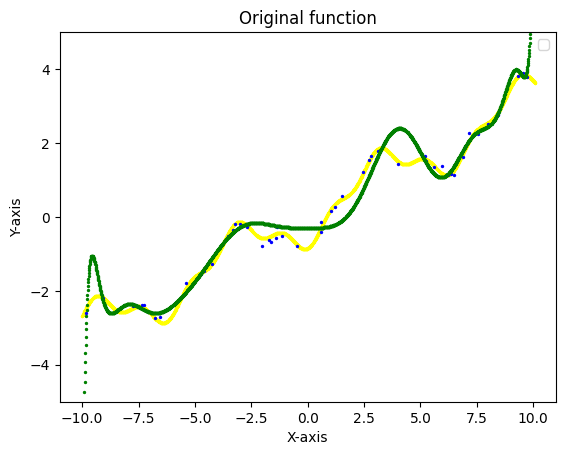

[-8.30182924e-02  2.42561623e-04  4.12046489e-04  1.52646761e-03
  5.25474577e-05  8.36925968e-03  1.61645643e-03 -8.05528313e-04
 -1.72409089e-04  3.28721886e-05  7.24826331e-06 -7.09935488e-07
 -1.55959312e-07  8.48420337e-09  1.82614980e-09 -5.30442329e-11
 -1.10901831e-11  1.35478512e-13  2.73921047e-14]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


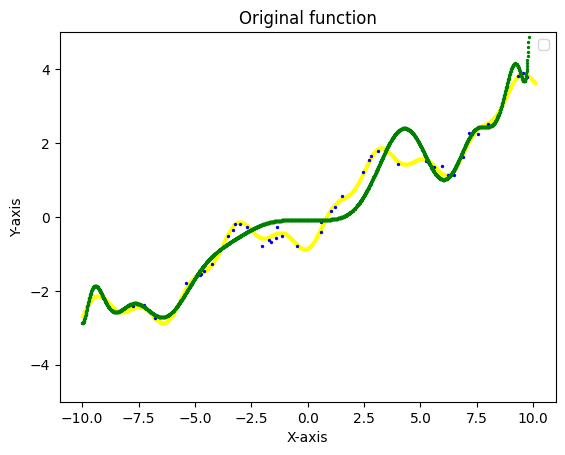

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 8.77564347e-02  6.92208678e-07  2.64658020e-05  5.52603802e-06
  1.02017085e-06  7.67369964e-05  1.18288809e-05  4.81717794e-04
  1.25221442e-05 -4.78108958e-05 -1.22393702e-06  1.96188185e-06
  4.27033977e-08 -4.22771312e-08 -7.00594936e-10  5.02936082e-10
  5.50310520e-12 -3.12891899e-12 -1.67098191e-14  7.95489119e-15]


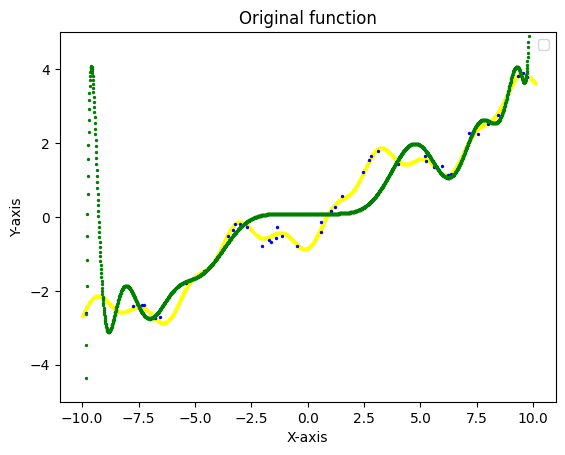

[ 1.63382224e-02  1.39283074e-09  2.04203446e-06  1.21641753e-07
  4.57409704e-07  3.01175915e-07  5.60234280e-06  2.93781697e-06
  4.07590870e-05  7.86939295e-06 -4.75313414e-06 -5.79795927e-07
  2.13259663e-07  1.68881260e-08 -4.84321757e-09 -2.43318851e-10
  5.94789133e-11  1.73122637e-12 -3.77326557e-13 -4.86208265e-15
  9.70732946e-16]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


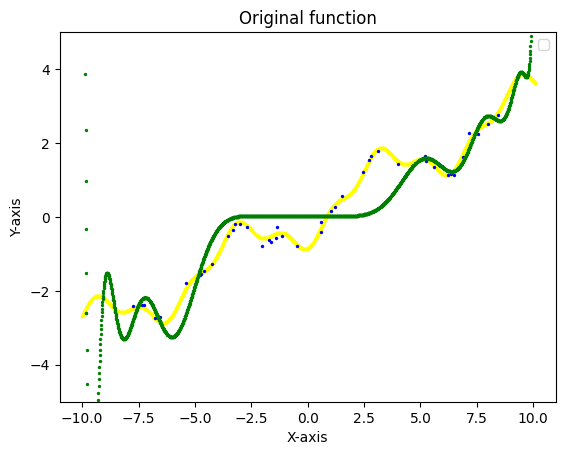

In [932]:
for i in range (1, 21):
    coefficients = polynomial_regression_sklearn(X, Y, i)
    print(coefficients)
    X_degree_i = []
    Y_degree_i = []
    for x in np.arange(-10.0, 10.1, 0.01):
        y_temp=0
        X_degree_i.append(x)
        for deg in range(0, i+1):
            y_temp = y_temp + coefficients[deg] * pow (x, deg)
        Y_degree_i.append(y_temp)
    fig, ax = plt.subplots()
    ax.set_xlim(-11, 11)
    ax.set_ylim(-5, 5)
    plt.scatter(X_cont, Y_cont, marker='o',  s=2, color='yellow')
    plt.scatter(X, Y, marker='o',  s=2, color='blue')
    plt.scatter(X_degree_i, Y_degree_i, marker='o',  s=2, color='green')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Original function')
    plt.legend()  
    plt.show()

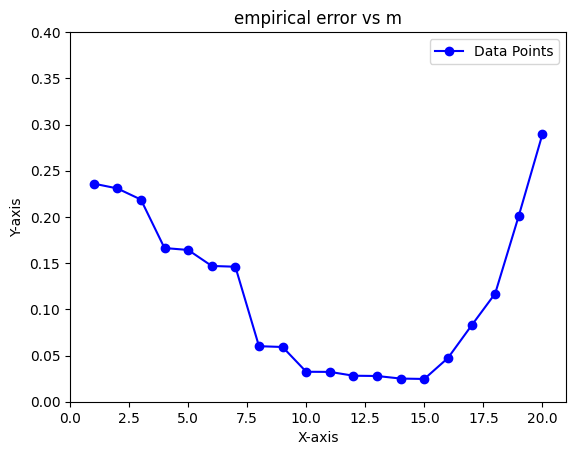

In [933]:
empirical_errors = []
m = []
for i in range (1,21):
    Y_pred = polynomial_regressor_gaus(X, Y, i)
    empirical_error = find_error(Y, Y_pred)
    m.append(i)
    empirical_errors.append(empirical_error)

title = 'empirical error vs m'
fig, ax = plt.subplots()
ax.set_xlim(0, 21)
ax.set_ylim(0, 0.4)
plt.plot(m, empirical_errors, marker='o', linestyle='-', color='b', label='Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(title)
plt.legend()  
plt.show()

In [934]:
total_number_of_data_points = 500
scaling_factor = 0.1
dataset500 = generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points)
X = [dataset_instance[0] for dataset_instance in dataset500]
Y = [dataset_instance[1] for dataset_instance in dataset500]

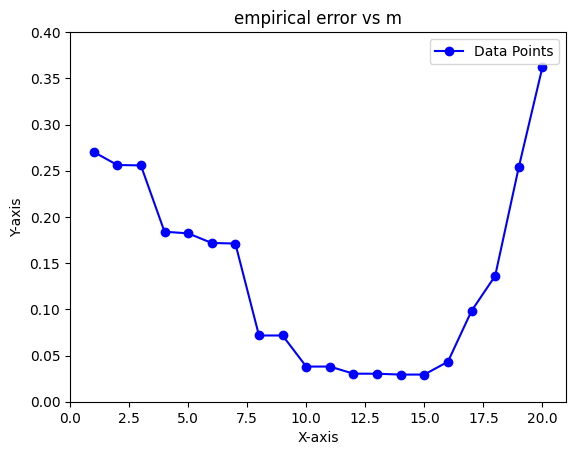

In [935]:
empirical_errors = []
m = []
for i in range (1,21):
    Y_pred = polynomial_regressor_gaus(X, Y, i)
    empirical_error = find_error(Y, Y_pred)
    m.append(i)
    empirical_errors.append(empirical_error)

title = 'empirical error vs m'
fig, ax = plt.subplots()
ax.set_xlim(0, 21)
ax.set_ylim(0, 0.4)
plt.plot(m, empirical_errors, marker='o', linestyle='-', color='b', label='Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(title)
plt.legend()  
plt.show()